***`Universidad de Sonora, Campus Hermosillo`***

---

***`Profesor: `*** *`Lizarraga Celaya Carlos`*

***`Materia: `*** *`Física Computacional`*

---

***`Trabajo: `*** *`Actividad 6`*

---

***`Alumno: `*** *`Bonillas Miranda Akin`*

***`Número de Expediente: `*** *`219211360`*

***`Correo: `*** *`a219211360@unison.mx // akinbonillasmiranda@gmail.com`*

***`Número Telefónico: `*** *`662 368 2474`*

---

***`Grupo: `*** *`2`*

***`Carrera: `*** *`Licenciatura en Física`*

***`Semestre: `*** *`Cuarto Semestre`*

---

***`Viernes 19 de Febrero de 2021, Hermosillo, Sonora`***

.

# *`URL de datos y Bibliotecas`*

In [ ]:
#============================ Importamos Bibliotecas ===========================

import pandas as pd                            # Importamos Pandas
import numpy as np                             # Importamos NumPy
import matplotlib.pyplot as plt                # Importamos Matplotlib
import seaborn as sns                          # Importamos Seaborn
import statsmodels.api as sm                   # Impotamos Statsmodels
from statsmodels.tsa.stattools import adfuller # Importamos una función de Statsmodels
import pandas.util.testing as tm               # Importamos una función de Pandas

# %matplotlib inline

#=================== Introducimos el URL del archivo de texto ==================

URL = 'https://raw.githubusercontent.com/Akin-Bonillas-Miranda/Fisica_Computacional/master/Actividad%201/2027.txt'

#============================ Definimos las columnas ===========================

cols = [ "Fecha", "Precip", "Evap", "Tmax", "Tmin" ]

#=========================== Estructuramos el Archivo ==========================

df_data = pd.read_csv( URL, names=cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python" )

#======= Hacemos una copia de trabajo y preservamos el DataFrame original ======

df_tran0 = df_data.copy()

#============= Reemplazamos los textos 'Nulo' por espacio en blanco ============

str_nulo = "Nulo"
df_tran1 = df_tran0.replace( to_replace=str_nulo, value=" ", regex=True )

#==== Convertimos los valores de las variables ambientales a núm. flotantes ====

cols_list = [ "Precip", "Evap", "Tmax", "Tmin" ]
for cols in cols_list:
  df_tran1[ cols ] = pd.to_numeric( df_tran1[cols], errors="coerce" )

#====== Hacemos una copia de trabajo y preservamos el DataFrame Modificado =====

df_tran2 = df_tran1.copy()

#================ Conviertimos una cadena en tipo datetime64[ns] ===============

df_tran2[ "Fecha" ] = pd.to_datetime( df_tran2[ "Fecha" ], dayfirst=True ).copy()

#=========== Buscamos ahora añadir dos columnas adicionales: Año, Mes ==========

df_tran2[ "Año" ] = df_tran2[ "Fecha" ].dt.year
df_tran2[ "Mes" ] = df_tran2[ "Fecha" ].dt.month

#== Definimos un nuevo DataFrame para el análisis de los datos meteorológicos == 

df_clim = df_tran2.copy()

# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_clim_cp = df_clim.copy()

# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_clim_cp = df_clim_cp.set_index('Fecha')

# Verificamos
# df_clim_cp.info()

# Seleccionaremos un conjunto de años de 30 años, creando las colecciones de datos 
df_57 = df_clim_cp[(df_clim_cp['Año'] >= 1957) & (df_clim_cp['Año'] < 1960)] # 3
df_60 = df_clim_cp[(df_clim_cp['Año'] >= 1960) & (df_clim_cp['Año'] < 1970)]
df_70 = df_clim_cp[(df_clim_cp['Año'] >= 1970) & (df_clim_cp['Año'] < 1980)]
df_80 = df_clim_cp[(df_clim_cp['Año'] >= 1980) & (df_clim_cp['Año'] < 1990)]
df_90 = df_clim_cp[(df_clim_cp['Año'] >= 1990) & (df_clim_cp['Año'] < 2000)]

.

# *`ACTIVIDAD 1`*

***`Actividad 1.`*** *`Tomar una serie de datos en un periodo sin huecos (Tmax, Tmin) de la estación que se está analizando, para probar si es una serie de tiempo estacionaria o hacer las transformaciones para convertirla en una. Ver el ejemplo mostrado en la Jupyter Notebook de esta actividad para realizar las acciones similares. `*

In [ ]:
#==================== Prueba Aumentada de Dickey-Fuller(ADF) ===================
   
def ADF(df_cp):
    
    #Determinar la Estadística de promedios móviles
    rollmean = df_cp.rolling( window=365, center=True ).mean()
    rollstd = df_cp.rolling( window=365, center=True ).std() 
    
    # Define el tamaño de la figura
    plt.rcParams["figure.figsize"] = (18,6)

    #Graficar la Estadística de promedios móviles 
    plt.plot( df_cp, color="black", markersize=5, label="Original" )
    plt.plot( rollmean, color="red", markersize=5,label="Promedio Móvil" )
    plt.plot( rollstd, color="blue", markersize=5,label = "Desviación STD Móvil" )
 
    plt.legend( loc="best" )
    plt.title( "Promedio Móvil y Desviación Estándar" )
    plt.grid()
    plt.show()
 
    #Realiza la Prueba Aumentada de Dickey-Fuller:
    print( "Resultados de la Prueba de Dickey-Fuller:" )
    print( " " )
    dftest = adfuller( df_cp, autolag="AIC" )
    dfoutput = pd.Series( dftest[0:4], index=["Estadística de prueba: ", "Valor p: ", "#Retrasos utilizados: ", "N° de Observaciones: "] )

    for key,value in dftest[4].items():
        dfoutput[ "Valor crítico (%s):" %key ] = value

    print( dfoutput )

#============= Fechas de inicio y fin, para filtrar la información =============

start, end = '1970-01', '1980-12'

cp_70 = df_70.loc[ start:end ].copy()
# cp_70.head()

# *`Temperatura Máxima (ADF - Datos Bruto)`*

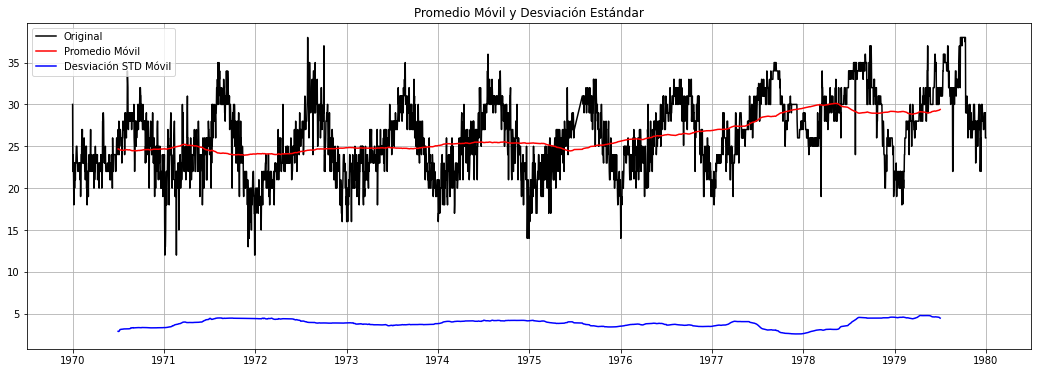

Resultados de la Prueba de Dickey-Fuller:
 
Estadística de prueba:       -3.925234
Valor p:                      0.001857
#Retrasos utilizados:        19.000000
N° de Observaciones:       3601.000000
Valor crítico (1%):          -3.432167
Valor crítico (5%):          -2.862343
Valor crítico (10%):         -2.567197
dtype: float64


In [ ]:
#============================== Temperatura Máxima =============================

cp_Tmax = cp_70['Tmax'].copy()

# Realizamos la Prueba de Estacionaridad de Tmax
ADF(cp_Tmax)

*`Como podemos observar en los resultados de la prueba ADF, el valor de p obtenido es menor que el 5% (0.001857 < 0.05), por lo que rechazamos la hipótesis nula de la No-estacionalidad. Podemos  afirmar que la serie de tiempo es estacionaria con 99% de confianza.`*

# *`Temperatura Mínima (ADF - Datos Brutos)`*

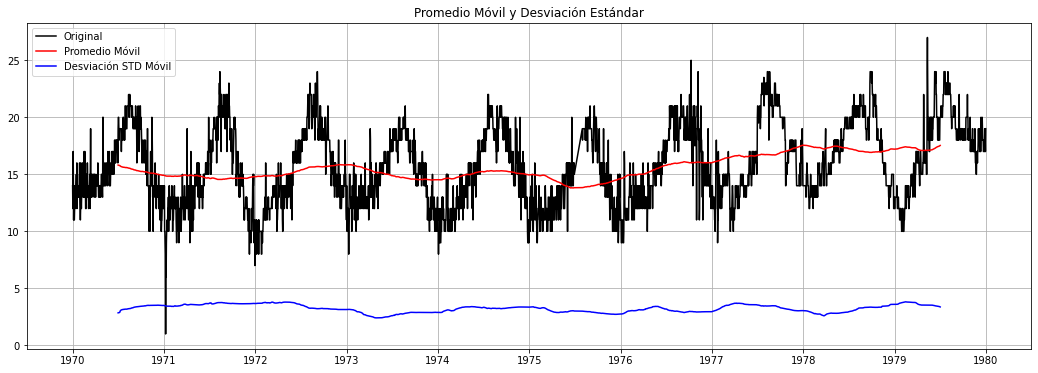

Resultados de la Prueba de Dickey-Fuller:
 
Estadística de prueba:       -3.702303
Valor p:                      0.004081
#Retrasos utilizados:        30.000000
N° de Observaciones:       3590.000000
Valor crítico (1%):          -3.432173
Valor crítico (5%):          -2.862345
Valor crítico (10%):         -2.567199
dtype: float64


In [ ]:
#============================== Temperatura Máxima =============================

cp_Tmin = cp_70['Tmin'].copy()

# Realizamos la Prueba de Estacionaridad de Tmax
ADF(cp_Tmin)

*`Como podemos observar en los resultados de la prueba ADF, el valor de p obtenido es menor que el 5% (0.004081 < 0.05), por lo que rechazamos la hipótesis nula de la No-estacionalidad. Podemos  afirmar que la serie de tiempo es estacionaria con 99% de confianza.`*

# *`Temperatura Máxima (ADF - Modificación Logaritmica)`*

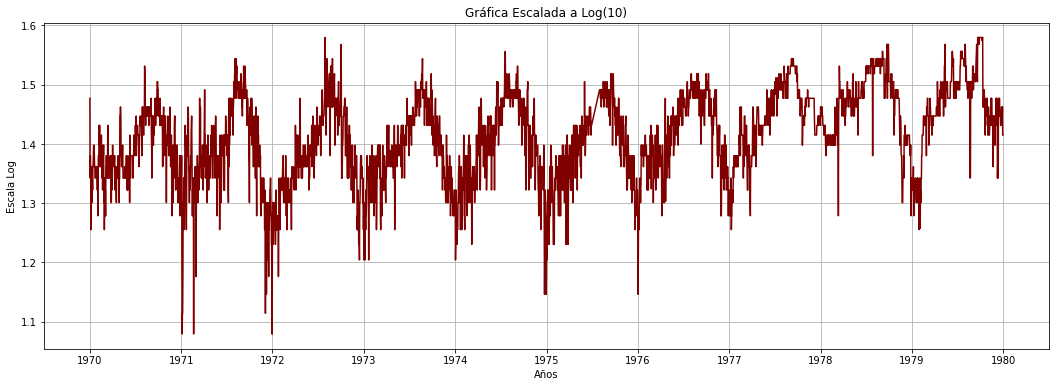

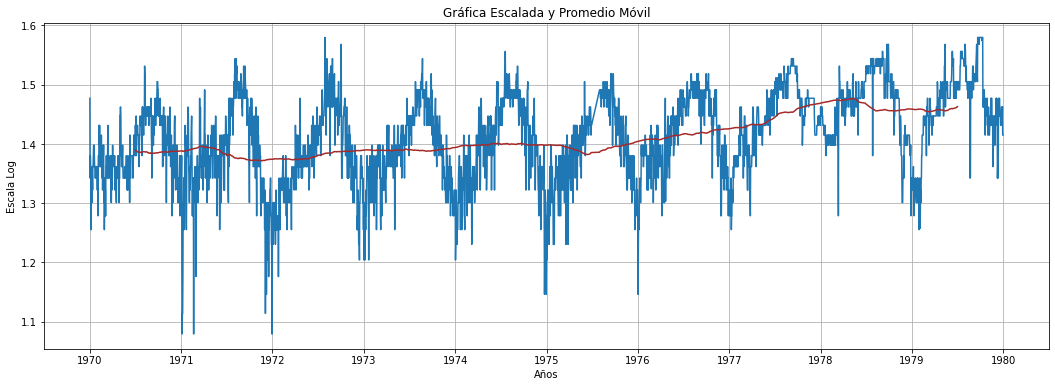

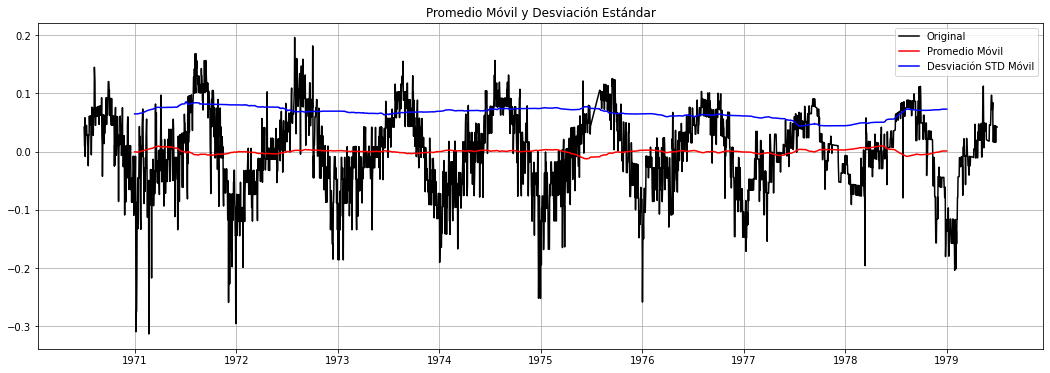

Resultados de la Prueba de Dickey-Fuller:
 
Estadística de prueba:       -4.178976
Valor p:                      0.000715
#Retrasos utilizados:        19.000000
N° de Observaciones:       3237.000000
Valor crítico (1%):          -3.432372
Valor crítico (5%):          -2.862433
Valor crítico (10%):         -2.567246
dtype: float64


In [ ]:
#================== Seleccionamos la función log y graficamos ==================

cp_logTmax = np.log10( cp_Tmax )
plt.plot( cp_logTmax, color="maroon" )

plt.xlabel( "Años", color="black" )
plt.ylabel( "Escala Log", color="black" )
plt.title( "Gráfica Escalada a Log(10)" )

plt.grid()
plt.show();

#=================== Calculamos el Promedio móvil a 365 días ===================

meanlogTmax = cp_logTmax.rolling( 365, center=True ).mean()
plt.plot( cp_logTmax )

plt.plot( meanlogTmax, color = "brown" )

plt.xlabel( "Años", color="black" )
plt.ylabel( "Escala Log", color="black" )
plt.title( "Gráfica Escalada y Promedio Móvil" )

plt.grid()
plt.show();



cp_logmovTmax_diff = cp_logTmax - meanlogTmax
# cp_logmovTmax_diff.head()

cp_logmovTmax_diff.dropna( inplace=True )
# cp_logmovTmax_diff.head()

#============== Aplicamos la Prueba ADF a la nueva serie de tiempo =============

ADF(cp_logmovTmax_diff)

*`Como podemos observar en los resultados de la prueba ADF, el valor de p obtenido es menor que el 5% (0.000715 < 0.05), por lo que rechazamos la hipótesis nula de la No-estacionalidad. Podemos  afirmar que la serie de tiempo es estacionaria con 99% de confianza.`*

# *`Temperatura Mínima (ADF - Modificación Logaritmica)`*

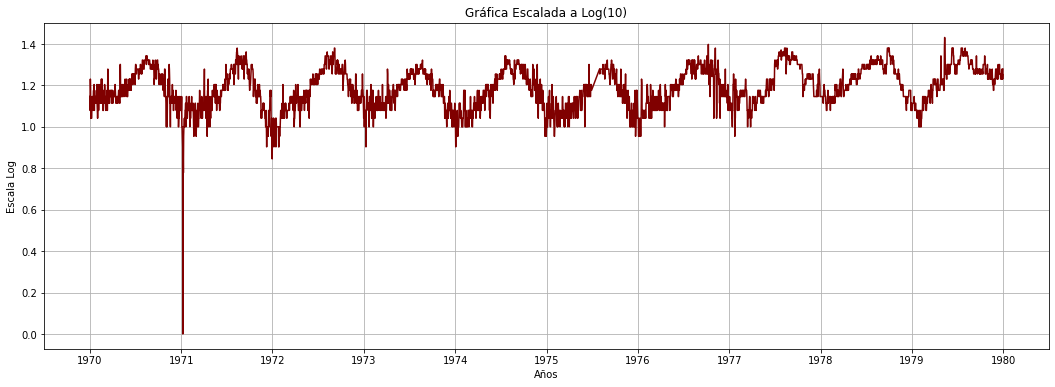

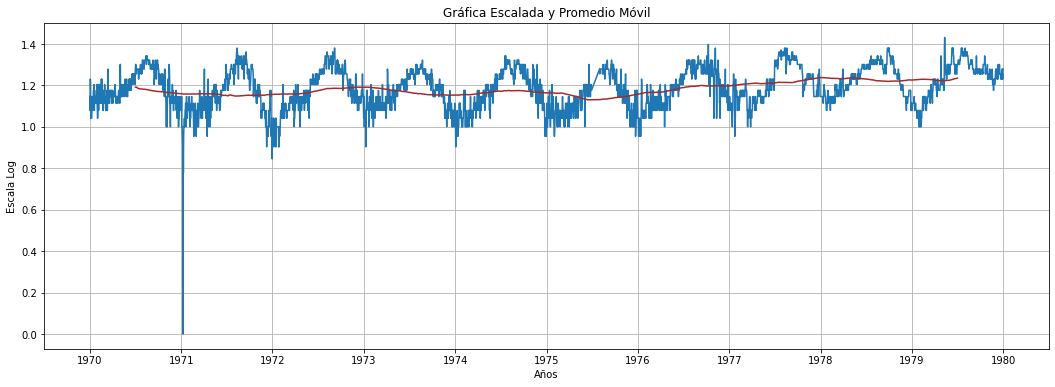

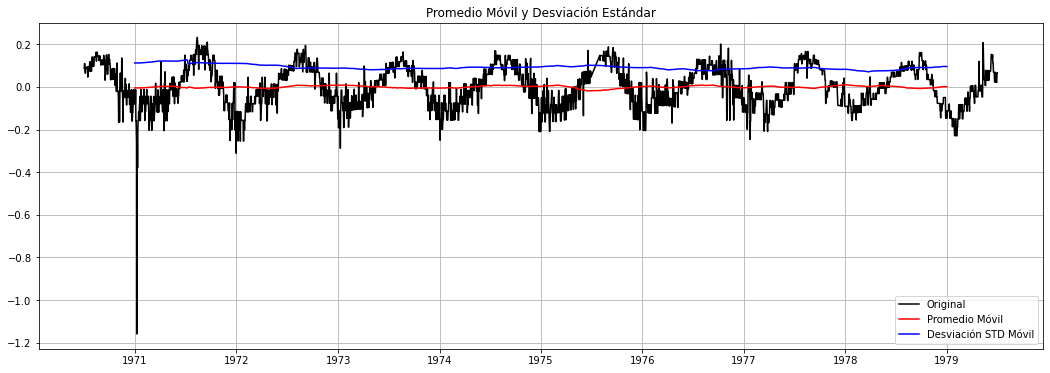

Resultados de la Prueba de Dickey-Fuller:
 
Estadística de prueba:       -3.612107
Valor p:                      0.005534
#Retrasos utilizados:        27.000000
N° de Observaciones:       3229.000000
Valor crítico (1%):          -3.432377
Valor crítico (5%):          -2.862436
Valor crítico (10%):         -2.567247
dtype: float64


In [ ]:
#================== Seleccionamos la función log y graficamos ==================

cp_logTmin = np.log10( cp_Tmin )
plt.plot( cp_logTmin, color="maroon" )

plt.xlabel( "Años", color="black" )
plt.ylabel( "Escala Log", color="black" )
plt.title( "Gráfica Escalada a Log(10)" )

plt.grid()
plt.show();

#=================== Calculamos el Promedio móvil a 365 días ===================

meanlogTmin = cp_logTmin.rolling( 365, center=True ).mean()
plt.plot( cp_logTmin )

plt.plot( meanlogTmin, color = "brown" )

plt.xlabel( "Años", color="black" )
plt.ylabel( "Escala Log", color="black" )
plt.title( "Gráfica Escalada y Promedio Móvil" )

plt.grid()
plt.show();



cp_logmovTmin_diff = cp_logTmin - meanlogTmin
# cp_logmovTmin_diff.head()

cp_logmovTmin_diff.dropna( inplace=True )
# cp_logmovTmin_diff.head()

#============== Aplicamos la Prueba ADF a la nueva serie de tiempo =============

ADF(cp_logmovTmin_diff)

*`Como podemos observar en los resultados de la prueba ADF, el valor de p obtenido es menor que el 5% (0.005534 < 0.05), por lo que rechazamos la hipótesis nula de la No-estacionalidad. Podemos  afirmar que la serie de tiempo es estacionaria con 99% de confianza.`*

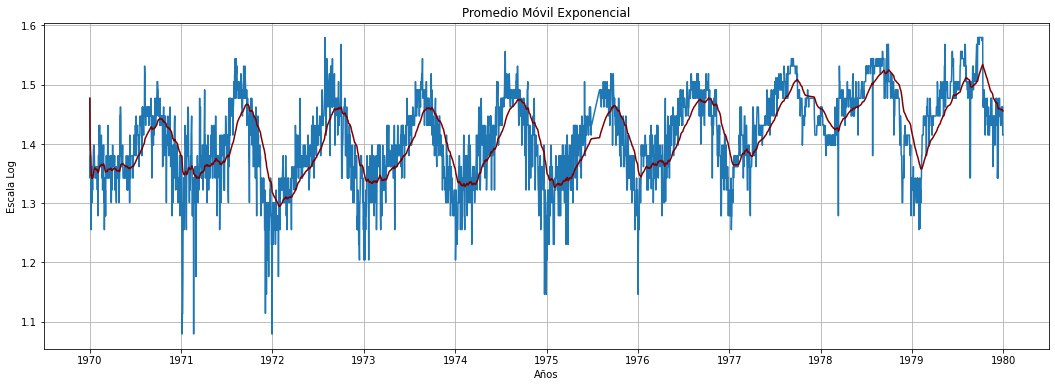

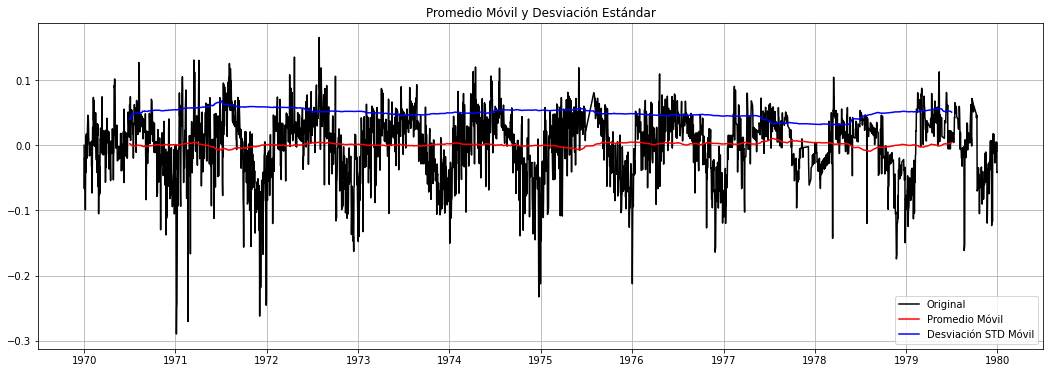

Resultados de la Prueba de Dickey-Fuller:
 
Estadística de prueba:    -6.156041e+00
Valor p:                   7.364617e-08
#Retrasos utilizados:      1.900000e+01
N° de Observaciones:       3.601000e+03
Valor crítico (1%):       -3.432167e+00
Valor crítico (5%):       -2.862343e+00
Valor crítico (10%):      -2.567197e+00
dtype: float64


In [ ]:
#================== Seleccionamos la función EWM y graficamos ==================
#------------------------- Exponential Weighted Moving -------------------------

# El parámetro 'halflife' representa el número de días que tienen
# cierta influencia en el promedio, pero su influencia decae exponencialmente.  

logTmaxEWM = cp_logTmax.ewm( halflife=30 ).mean()
plt.plot( cp_logTmax )

plt.plot( logTmaxEWM, color = "maroon" )
plt.xlabel( "Años", color="black" )
plt.ylabel( "Escala Log", color="black" )
plt.title( "Promedio Móvil Exponencial" )

plt.grid()
plt.show();



# Probamos la estacionarida de la diferencia 
cp_logmovTmaxEWM_diff = cp_logTmax - logTmaxEWM

# Probamos ahora la estacionaridad de la nueva serie de tiempo escalada en Log y usando EWM
ADF( cp_logmovTmaxEWM_diff )

*`Como podemos observar en los resultados de la prueba ADF, el valor de p obtenido es menor que el 5% (7.364617e-08 < 0.05), por lo que rechazamos la hipótesis nula de la No-estacionalidad. Podemos  afirmar que la serie de tiempo es estacionaria con 99% de confianza.`*

# *`ACTIVIDAD 2`*

***`Activida 2.`*** *`Construye los modelos ARIMA para cada Temperatura (Tmax y Tmin), y contrasta la bondad del ajuste en cada caso, calculando el error de la raíz cuadrada promedio RMSE y sobreponiendo gráficamente ambas series, la observada y la construida con el método ARIMA.`*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para el análisis de Series de Tiempo y Modelos de Pronóstico
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf

import pandas.util.testing as tm

# Suprimir mensajes de alertas de cambios futuros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# %matplotlib inline

# *`ARIMA: Temperatura Máxima`*

q=4
p=3


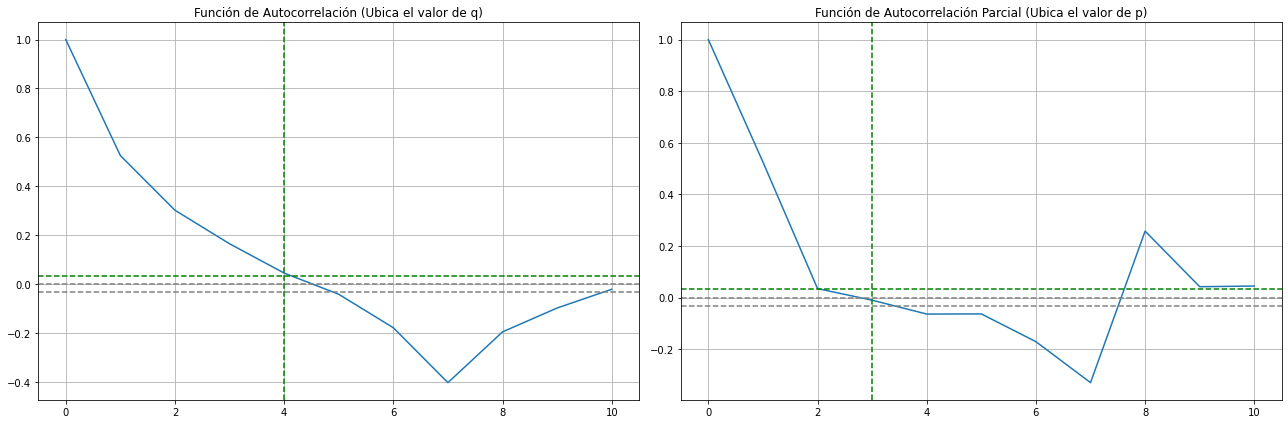

In [ ]:
#=============================== Aplicamos ARIMA ===============================

lag_acf = acf( cp_logTmax_diff, nlags=10 )
lag_pacf = pacf( cp_logTmax_diff, nlags=10, method = "ols" )

# Tamaño de las gráficas
plt.rcParams[ "figure.figsize" ] = ( 18,6 )

#----------------- Gráfica de ACF (Función de Autocorrelación) -----------------

plt.subplot( 121 )
plt.plot( lag_acf )

plt.axhline( y=0, linestyle="--", color="gray" )
plt.axhline( y=-1.96/np.sqrt(len(cp_logTmax_diff)), linestyle="--", color="gray" )
plt.axhline( y=1.96/np.sqrt(len(cp_logTmax_diff)), linestyle="--", color="green" )

# Graficamos unas líneas verticales como referencias
plt.axvline( x=4, linestyle="--", color="green" )
plt.grid()
plt.title( "Función de Autocorrelación (Ubica el valor de q)" )
print( "q=4" )

#------------- Gráfica de PACF (Función de Autocorrelación Parcial) ------------

plt.subplot( 122 )
plt.plot( lag_pacf )

plt.axhline( y=0, linestyle="--", color="gray" )
plt.axhline( y=-1.96/np.sqrt(len(cp_logTmax_diff)), linestyle="--", color="gray" )
plt.axhline( y=1.96/np.sqrt(len(cp_logTmax_diff)), linestyle="--", color="green" )

# Graficamos unas líneas verticales como referencias 
plt.axvline( x=3, linestyle='--', color="green" )
plt.grid()
plt.title( "Función de Autocorrelación Parcial (Ubica el valor de p)" )
print( "p=3" )

plt.tight_layout()

# *`Modelo AR (Autoregresión): Temperatura Máxima`*

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 3620
Model:                 ARIMA(3, 1, 0)   Log Likelihood                7235.567
Method:                       css-mle   S.D. of innovations              0.033
Date:                Sun, 21 Feb 2021   AIC                         -14461.133
Time:                        00:35:22   BIC                         -14430.162
Sample:                             1   HQIC                        -14450.099
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.004e-06      0.000     -0.003      0.997      -0.001       0.001
ar.L1.D.Tmax    -0.3638      0.017    -22.030      0.000      -0.396      -0.331
ar.L2.D.Tmax    -0.2259      0.017    -13.14

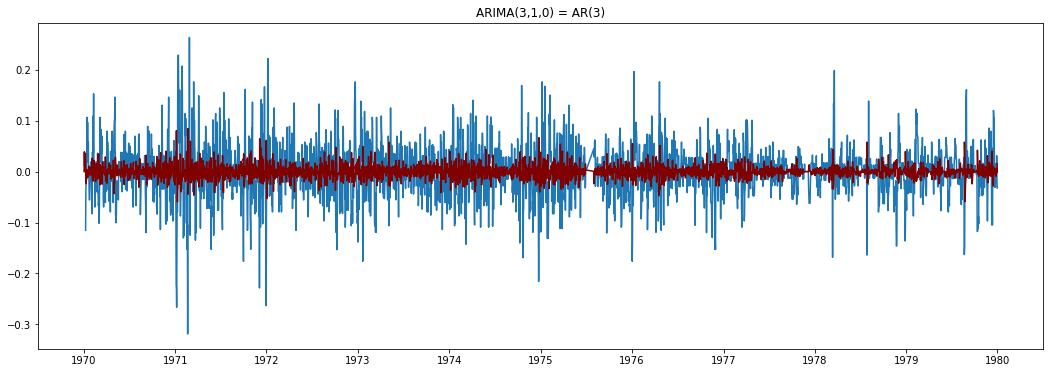

In [ ]:
#======================= Modelo AR(p): (p,d,q) = (3,1,0) =======================

modelo = ARIMA( cp_logTmax, order=(3,1,0), missing="drop" )

results_AR = modelo.fit( displ=-1 )

plt.plot( cp_logTmax_diff )
plt.plot( results_AR.fittedvalues, color="maroon" )
plt.title("ARIMA(3,1,0) = AR(3)" )

print( results_AR.summary() )


# *`Modelo MA (Promedio Móvil): Temperatura Máxima`*

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 3620
Model:                 ARIMA(0, 1, 4)   Log Likelihood                7349.522
Method:                       css-mle   S.D. of innovations              0.032
Date:                Sun, 21 Feb 2021   AIC                         -14687.045
Time:                        01:07:30   BIC                         -14649.879
Sample:                             1   HQIC                        -14673.804
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.724e-05      0.000      0.128      0.898      -0.000       0.000
ma.L1.D.Tmax    -0.4356      0.017    -26.225      0.000      -0.468      -0.403
ma.L2.D.Tmax    -0.1525      0.018     -8.49

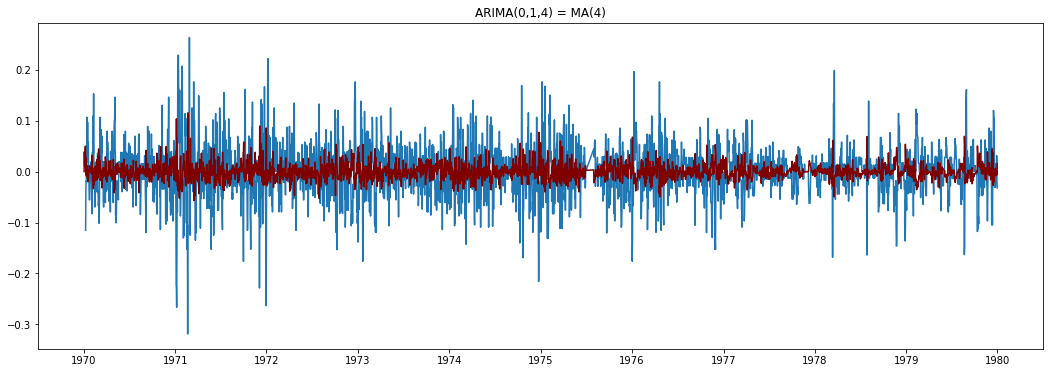

In [ ]:
#======================= Modelo MA(q): (p,d,q) = (0,1,4) =======================

modelo = ARIMA( cp_logTmax, order=(0,1,4), missing="drop" )

results_MA = modelo.fit(displ=-1)

plt.plot( cp_logTmax_diff )
plt.plot( results_MA.fittedvalues, color="maroon" )
plt.title( "ARIMA(0,1,4) = MA(4)" )

print( results_MA.summary() )


# *`Modelo ARIMA (AR + MA): Temperatura Máxima`*

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 3620
Model:                 ARIMA(3, 1, 4)   Log Likelihood                7351.680
Method:                       css-mle   S.D. of innovations              0.032
Date:                Sun, 21 Feb 2021   AIC                         -14685.360
Time:                        01:07:44   BIC                         -14629.612
Sample:                             1   HQIC                        -14665.499
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.719e-05      0.000      0.132      0.895      -0.000       0.000
ar.L1.D.Tmax    -0.8512      0.583     -1.460      0.144      -1.994       0.291
ar.L2.D.Tmax     0.1676      0.194      0.86

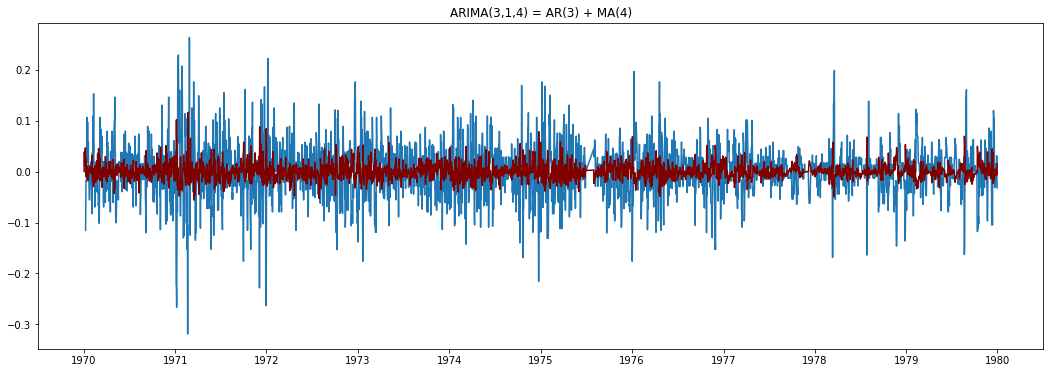

In [ ]:
#====================== Modelo ARIMA(p): (p,d,q) = (3,1,4) =====================

modelo = ARIMA( cp_logTmax, order=(3,1,4), missing="drop" )

results_ARIMA = modelo.fit( displ=-1 )

plt.plot( cp_logTmax_diff)
plt.plot( results_ARIMA.fittedvalues, color="maroon" )
plt.title( "ARIMA(3,1,4) = AR(3) + MA(4)" )

print( results_ARIMA.summary() )


In [ ]:
# Definimos una serie de tiempo con las predicciones obtenidas por el método ARIMA

predic_ARIMA_diff = pd.Series( results_ARIMA.fittedvalues, copy=True )
print( predic_ARIMA_diff )

Fecha
1970-01-02    0.000017
1970-01-03    0.038841
1970-01-04    0.012013
1970-01-05    0.016622
1970-01-06    0.032754
                ...   
1979-12-27   -0.007255
1979-12-28   -0.006155
1979-12-29    0.000976
1979-12-30   -0.005992
1979-12-31    0.015543
Length: 3620, dtype: float64


In [ ]:
# Le sumamos las predicciones de ARIMA a la serie observada (cp_logTmax)

predic_logARIMA = pd.Series( cp_logTmax, index = cp_logTmax.index )
predic_logARIMA = predic_logARIMA.add( predic_ARIMA_diff )

print( predic_logARIMA.head() )
print( predic_logARIMA.tail() )


Fecha
1970-01-01         NaN
1970-01-02    1.342440
1970-01-03    1.419053
1970-01-04    1.373741
1970-01-05    1.338841
dtype: float64
Fecha
1979-12-27    1.455143
1979-12-28    1.441003
1979-12-29    1.463374
1979-12-30    1.408982
1979-12-31    1.430517
dtype: float64


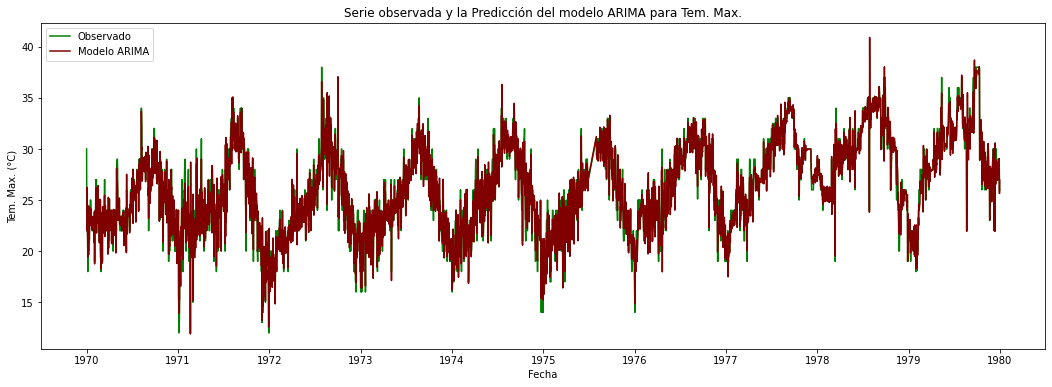

In [ ]:
#======================== Graficamos serie y predicción ========================

predic_ARIMA = 10**( predic_logARIMA )

plt.rcParams["figure.figsize"] = ( 18,6 )

plt.plot( cp_Tmax, label="Observado", color="green" );
plt.plot( predic_ARIMA, label="Modelo ARIMA", color="maroon" );
plt.xlabel( "Fecha" )
plt.ylabel( "Tem. Max. (°C)" )
plt.title( "Serie observada y la Predicción del modelo ARIMA para Tem. Max." )

plt.legend( loc="best" );


In [ ]:
# Calculamos el RMSE (Root Mean Square Error - Error de la Raiz Cuadrada de la Media)

RMSE = np.sqrt( np.mean((predic_ARIMA - cp_Tmax)**2) )
print( "RMSE:" , RMSE)

RMSE: 0.8508605729789376


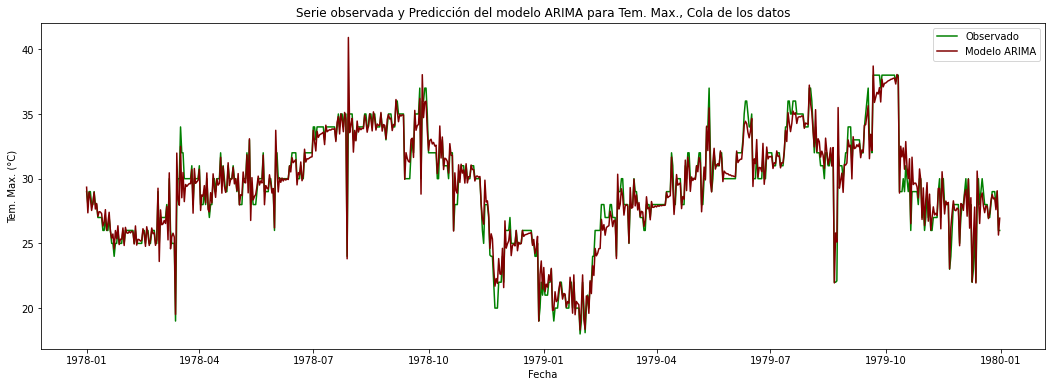

In [ ]:
# Graficamos sólo los útimos datos de las series 

cp_Tmax_last = cp_Tmax.tail(730)

predic_ARIMA_last = predic_ARIMA.tail(730)

plt.plot( cp_Tmax_last, label="Observado", color="green" );
plt.plot( predic_ARIMA_last, label="Modelo ARIMA", color="maroon" );
plt.xlabel( "Fecha" )
plt.ylabel( "Tem. Max. (°C)" )
plt.title( "Serie observada y Predicción del modelo ARIMA para Tem. Max., Cola de los datos" )

plt.legend( loc="best" );


# *`ARIMA: Temperatura Mínima`*

q=5
p=3


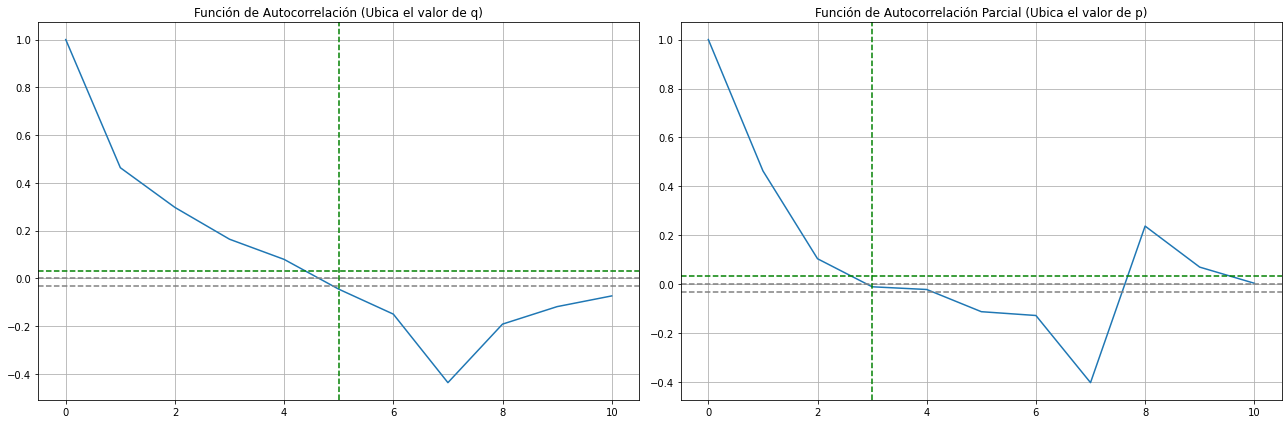

In [ ]:
#=============================== Aplicamos ARIMA ===============================

lag_acf = acf( cp_logTmin_diff, nlags=10 )
lag_pacf = pacf( cp_logTmin_diff, nlags=10, method = "ols" )

# Tamaño de las gráficas
plt.rcParams[ "figure.figsize" ] = ( 18,6 )

#----------------- Gráfica de ACF (Función de Autocorrelación) -----------------

plt.subplot( 121 )
plt.plot( lag_acf )

plt.axhline( y=0, linestyle="--", color="gray" )
plt.axhline( y=-1.96/np.sqrt(len(cp_logTmin_diff)), linestyle="--", color="gray" )
plt.axhline( y=1.96/np.sqrt(len(cp_logTmin_diff)), linestyle="--", color="green" )

# Graficamos unas líneas verticales como referencias
plt.axvline( x=5, linestyle="--", color="green" )
plt.grid()
plt.title( "Función de Autocorrelación (Ubica el valor de q)" )
print( "q=5" )

#------------- Gráfica de PACF (Función de Autocorrelación Parcial) ------------

plt.subplot( 122 )
plt.plot( lag_pacf )

plt.axhline( y=0, linestyle="--", color="gray" )
plt.axhline( y=-1.96/np.sqrt(len(cp_logTmin_diff)), linestyle="--", color="gray" )
plt.axhline( y=1.96/np.sqrt(len(cp_logTmin_diff)), linestyle="--", color="green" )

# Graficamos unas líneas verticales como referencias 
plt.axvline( x=3, linestyle='--', color="green" )
plt.grid()
plt.title( "Función de Autocorrelación Parcial (Ubica el valor de p)" )
print( "p=3" )

plt.tight_layout()

# *`Modelo AR (Autoregresión): Temperatura Mínima`*

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmin   No. Observations:                 3620
Model:                 ARIMA(3, 1, 0)   Log Likelihood                6314.539
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 21 Feb 2021   AIC                         -12619.078
Time:                        01:05:00   BIC                         -12588.106
Sample:                             1   HQIC                        -12608.043
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.208e-05      0.000      0.085      0.932      -0.001       0.001
ar.L1.D.Tmin    -0.4646      0.016    -28.256      0.000      -0.497      -0.432
ar.L2.D.Tmin    -0.2613      0.018    -14.79

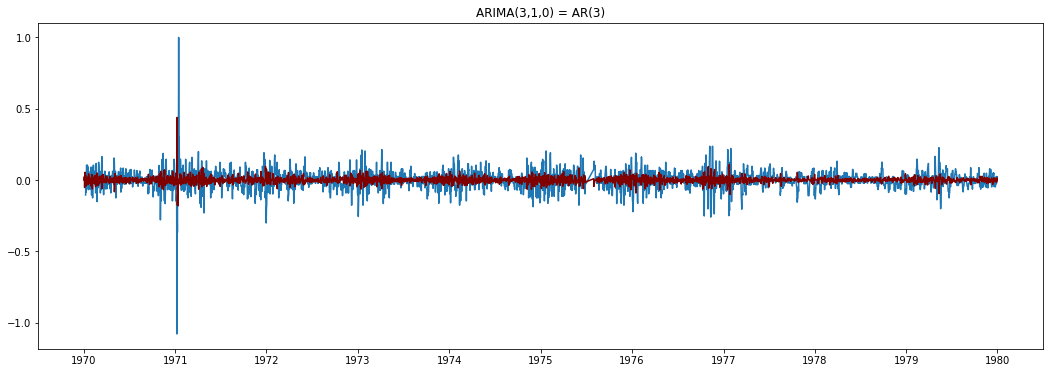

In [ ]:
#======================= Modelo AR(p): (p,d,q) = (3,1,0) =======================

modelo = ARIMA( cp_logTmin, order=(3,1,0), missing="drop" )

results_AR = modelo.fit( displ=-1 )

plt.plot( cp_logTmin_diff )
plt.plot( results_AR.fittedvalues, color="maroon" )
plt.title( "ARIMA(3,1,0) = AR(3)" )

print( results_AR.summary() )


# *`Modelo MA (Promedio Móvil): Temperatura Mínima`*

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmin   No. Observations:                 3620
Model:                 ARIMA(0, 1, 3)   Log Likelihood                6394.836
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sun, 21 Feb 2021   AIC                         -12779.672
Time:                        01:03:31   BIC                         -12748.701
Sample:                             1   HQIC                        -12768.638
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.624e-05      0.000      0.199      0.842      -0.000       0.000
ma.L1.D.Tmin    -0.5275      0.017    -31.818      0.000      -0.560      -0.495
ma.L2.D.Tmin    -0.1020      0.019     -5.25

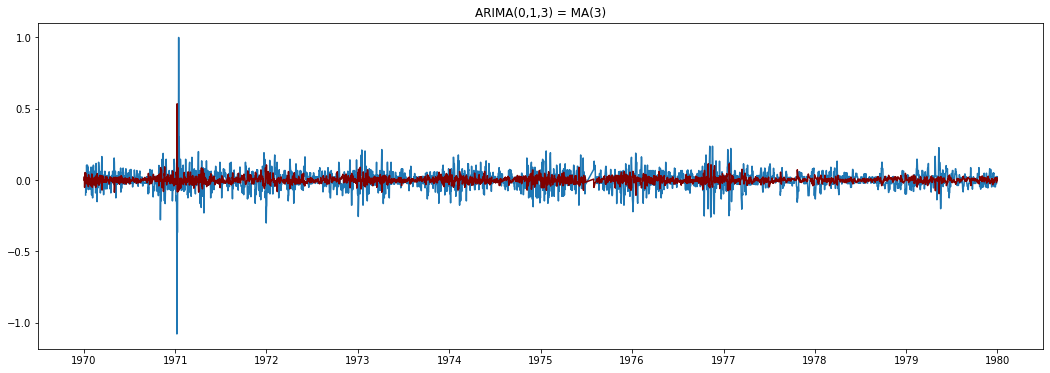

In [ ]:
#======================= Modelo MA(q): (p,d,q) = (0,1,5) =======================

modelo = ARIMA( cp_logTmin, order=(0,1,3), missing="drop" ) 
# q se cambió de 5 a 3, ya que por alguna razón no calcula con los valores 5 y 4

results_MA = modelo.fit( displ=-1 )

plt.plot( cp_logTmin_diff )
plt.plot( results_MA.fittedvalues, color="maroon" )
plt.title( "ARIMA(0,1,3) = MA(3)" )

print( results_MA.summary() )

# *`Modelo ARIMA (AR + MA): Temperatura Máxima`*

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmin   No. Observations:                 3620
Model:                 ARIMA(3, 1, 5)   Log Likelihood                6410.237
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sun, 21 Feb 2021   AIC                         -12800.474
Time:                        01:03:27   BIC                         -12738.531
Sample:                             1   HQIC                        -12778.405
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.645e-05      0.000      0.228      0.819      -0.000       0.000
ar.L1.D.Tmin    -0.6683      0.120     -5.556      0.000      -0.904      -0.433
ar.L2.D.Tmin    -0.1727      0.130     -1.33

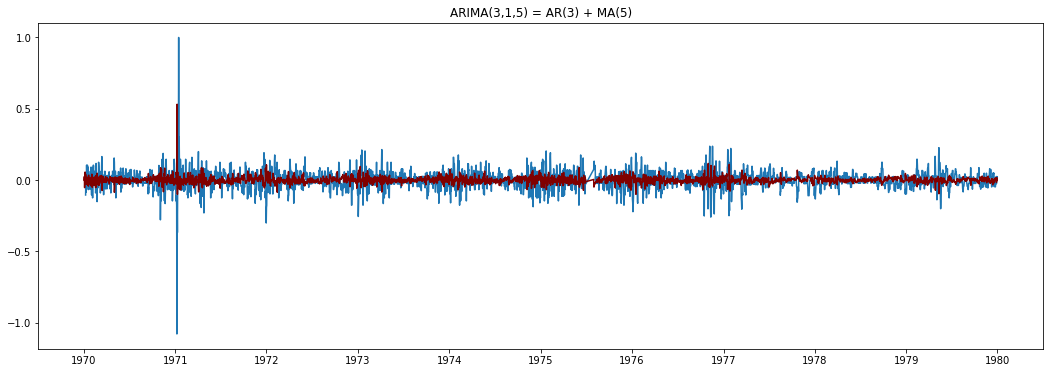

In [ ]:
#====================== Modelo ARIMA(p): (p,d,q) = (3,1,5) =====================

modelo = ARIMA( cp_logTmin, order=(3,1,5), missing="drop" )

results_ARIMA = modelo.fit( displ=-1 )

plt.plot( cp_logTmin_diff)
plt.plot( results_ARIMA.fittedvalues, color="maroon" )
plt.title( "ARIMA(3,1,5) = AR(3) + MA(5)" )

print( results_ARIMA.summary() )


In [ ]:
# Definimos una serie de tiempo con las predicciones obtenidas por el método ARIMA

predic_ARIMA_diff = pd.Series( results_ARIMA.fittedvalues, copy=True )
print( predic_ARIMA_diff )

Fecha
1970-01-02    0.000036
1970-01-03    0.024515
1970-01-04   -0.052987
1970-01-05   -0.003436
1970-01-06    0.056392
                ...   
1979-12-27    0.013534
1979-12-28   -0.016235
1979-12-29    0.014973
1979-12-30   -0.003640
1979-12-31    0.012671
Length: 3620, dtype: float64


In [ ]:
# Le sumamos las predicciones de ARIMA a la serie observada (cp_logTmax)

predic_logARIMA = pd.Series( cp_logTmin, index = cp_logTmin.index )
predic_logARIMA = predic_logARIMA.add( predic_ARIMA_diff )

print( predic_logARIMA.head() )
print( predic_logARIMA.tail() )


Fecha
1970-01-01         NaN
1970-01-02    1.079218
1970-01-03    1.254964
1970-01-04    1.123105
1970-01-05    1.037957
dtype: float64
Fecha
1979-12-27    1.292288
1979-12-28    1.214214
1979-12-29    1.270246
1979-12-30    1.226809
1979-12-31    1.291424
dtype: float64


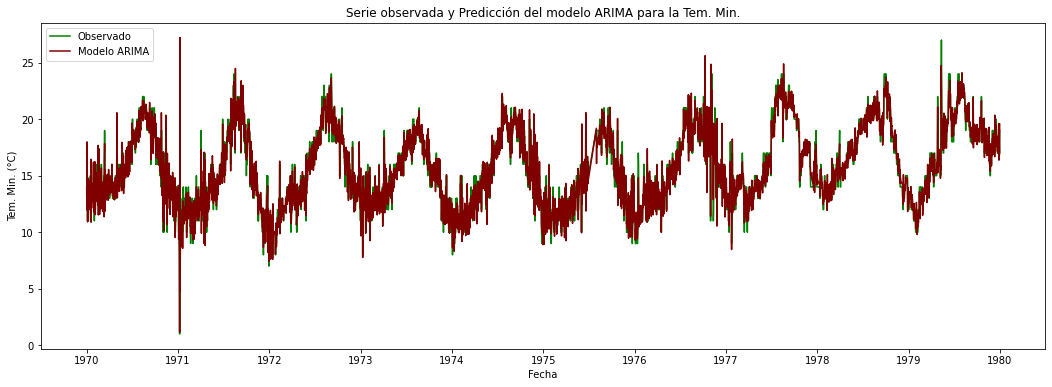

In [ ]:
#======================== Graficamos serie y predicción ========================

predic_ARIMA = 10**( predic_logARIMA )

plt.rcParams["figure.figsize"] = ( 18,6 )

plt.plot( cp_Tmin, label="Observado", color="green" );
plt.plot( predic_ARIMA, label="Modelo ARIMA", color="maroon" );
plt.xlabel( "Fecha" )
plt.ylabel( "Tem. Min. (°C)" )
plt.title( "Serie observada y Predicción del modelo ARIMA para la Tem. Min." )

plt.legend( loc="best" );


In [ ]:
#============================== Calculamos el RMSE =============================

RMSE = np.sqrt( np.mean((predic_ARIMA - cp_Tmin)**2) )
print( "RMSE:" , RMSE)

RMSE: 0.7665423132413474


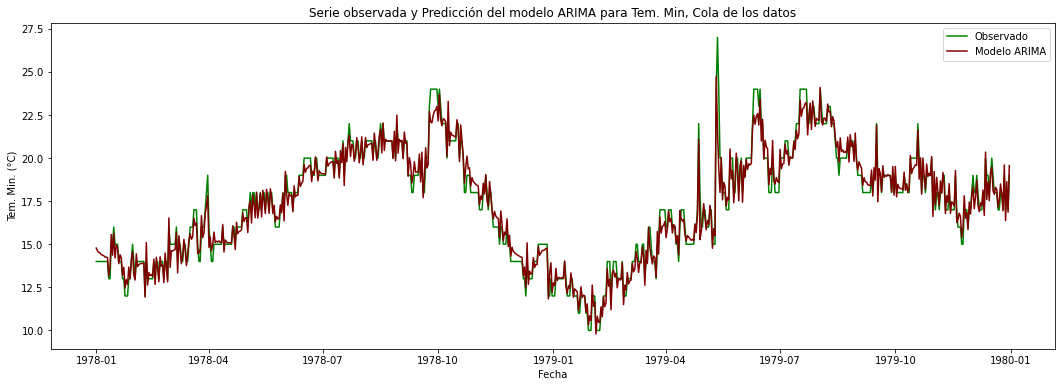

In [ ]:
#================ Graficamos sólo los útimos datos de las series ===============

cp_Tmin_last = cp_Tmin.tail(730)

predic_ARIMA_last = predic_ARIMA.tail(730)

plt.plot( cp_Tmin_last, label="Observado", color="green" );
plt.plot( predic_ARIMA_last, label="Modelo ARIMA", color="maroon" );
plt.xlabel( "Fecha" )
plt.ylabel( "Tem. Min. (°C)" )
plt.title( "Serie observada y Predicción del modelo ARIMA para Tem. Min, Cola de los datos" )

plt.legend( loc="best" );
